# Categorical Boosting (CatBoost) -  Object Detection

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import catboost
import os

## Dataset

Generate training data (to be changed with a dataset):

- x: training input (in this case a 64x64 image with a white square)
- y: training ground truth (the square position in terms of top left pixel coordinates)

Input variables: 

- batch_size: number of samples to be generated
 

In [157]:
def generate_data(batch_size=16):
    # Start generator
    while True:
        # Initialize input and ground truth variables
        x = np.zeros((batch_size, 64 * 64))
        
        y = np.zeros((batch_size, 2))
        
        # Fill batches
        for i in range(batch_size):
            
            width = 12 #np.random.randint(4, 10, 1)[0]
            height = 12 #np.random.randint(4, 10, 1)[0]

            px = np.random.randint(width, 64 - width, 1)[0]
            py = np.random.randint(height, 64 - height, 1)[0]
            
            img = np.zeros((64, 64, 1))
            img[py:py+height, px:px+width, 0] = 1.0
                                    
            x[i,:] = img.flatten()
            y[i,0] = px + width/2
            y[i,1] = py + height/2
            
        # Return values for generator
        yield x, y

Call the generator to get a training sample

In [158]:
x, y = next(iter(generate_data(batch_size=1)))

Plot an example

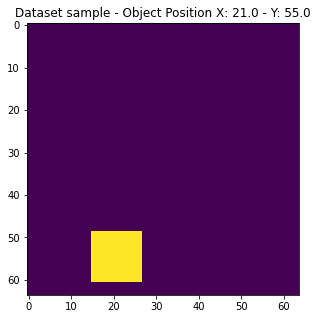

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.imshow(x[0,:].reshape((64,64)))
ax.set_title('Dataset sample - Object Position X: {} - Y: {}'.format(y[0,0], y[0,1]))
plt.show()

## Define the CatBoost Regressor

In [160]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(
            iterations=90000,
            task_type='CPU',
            learning_rate=0.02,
            loss_function='MultiRMSE',
            random_seed=101,
            max_depth=6,
            eval_metric='MultiRMSE',
            verbose = True,
            early_stopping_rounds = 500
        )

Load training and validation dataset

In [161]:
x_train, y_train = next(iter(generate_data(batch_size=20000)))
x_test, y_test = next(iter(generate_data(batch_size=1500)))

Train the CatBoost Regressor

In [ ]:
regressor.fit(x_train, 
              y_train, 
              eval_set = (x_test, y_test)
             )

Save trained model

In [166]:
regressor.save_model(os.path.join('weights', 'object_detector'))
#regressor.laod_model(os.path.join('weights', 'noise_filter'))

Apply the trained regressor

In [167]:
y_p = regressor.predict(x_test)
y_p[y_p < 0] = 0
y_p[y_p > 63] = 63

Plot results

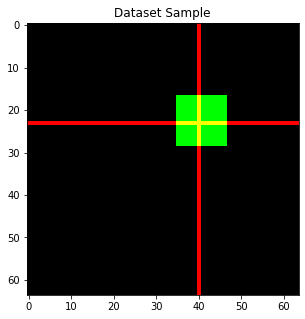

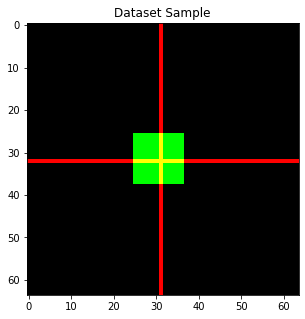

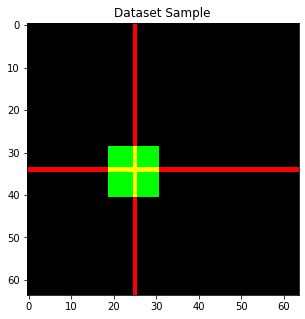

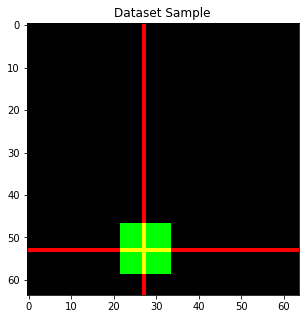

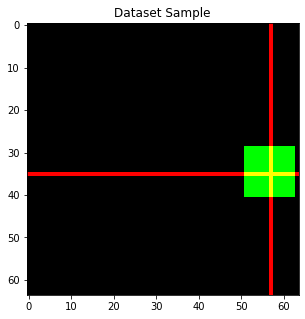

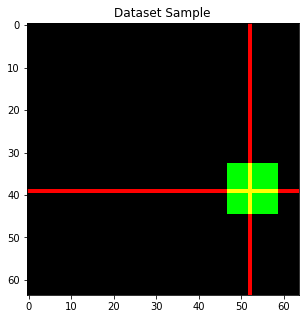

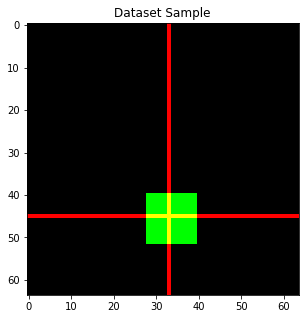

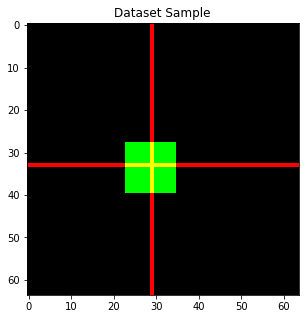

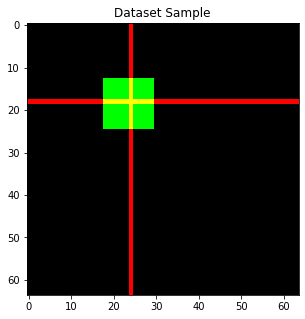

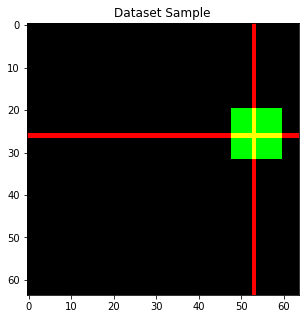

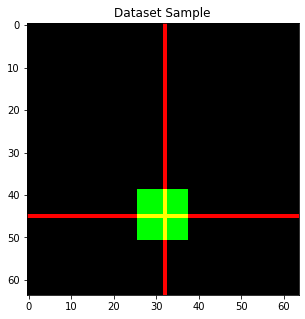

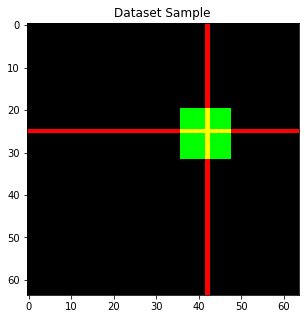

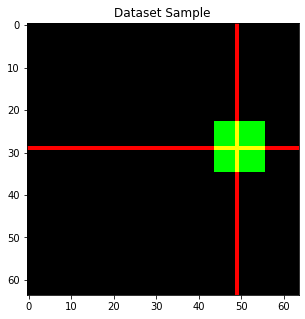

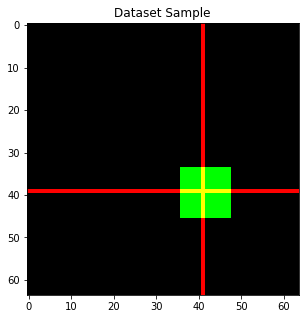

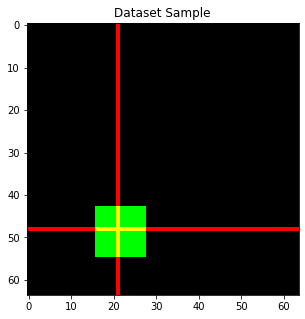

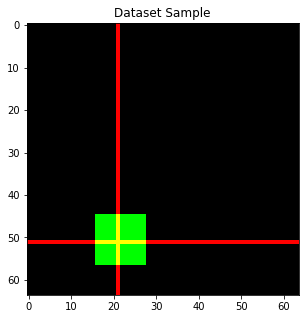

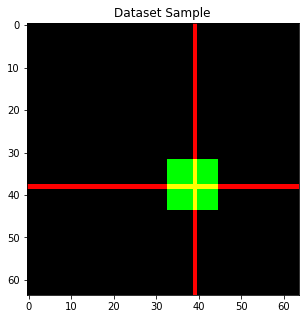

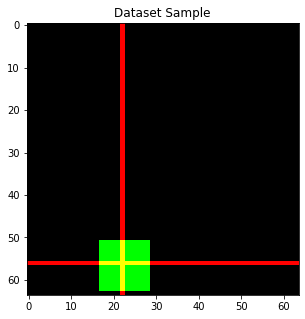

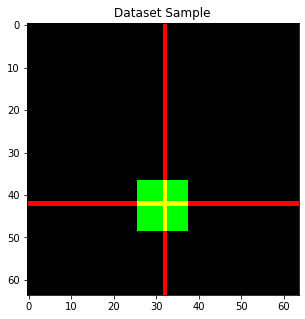

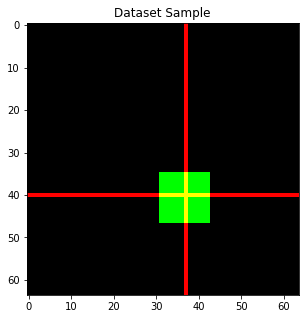

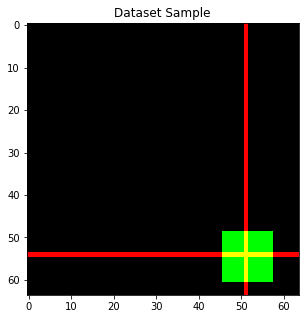

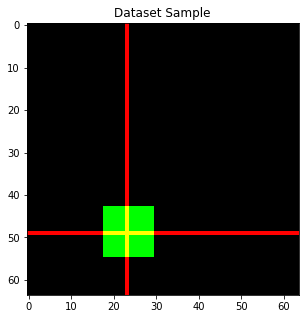

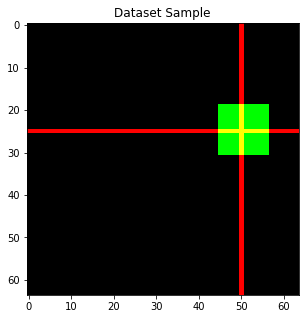

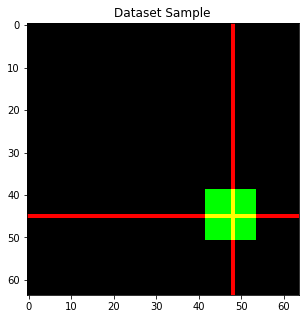

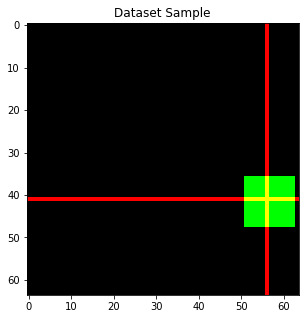

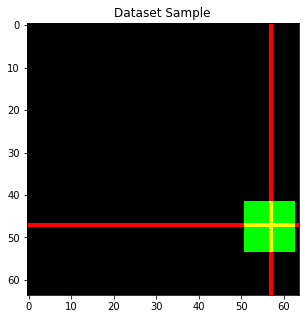

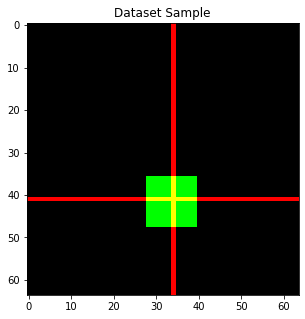

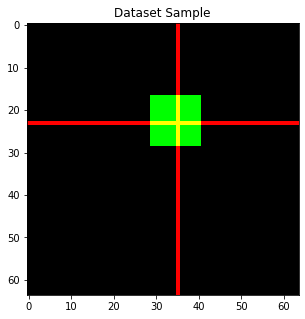

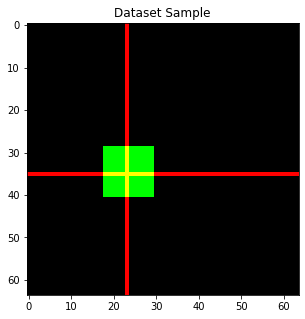

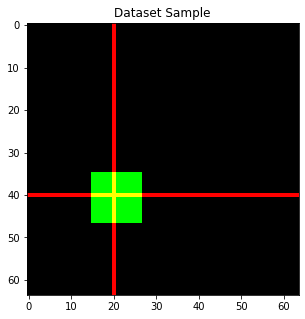

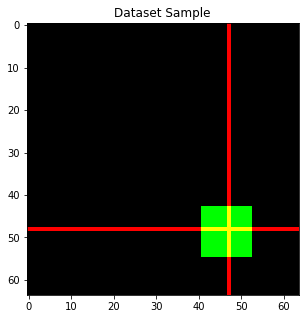

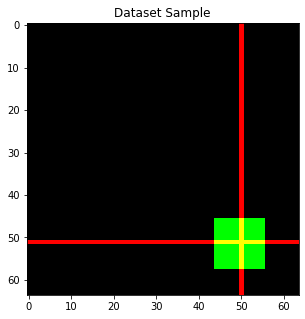

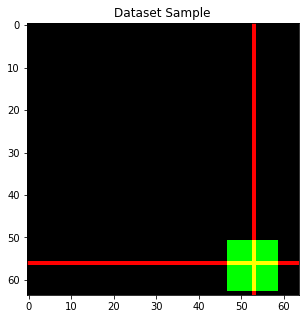

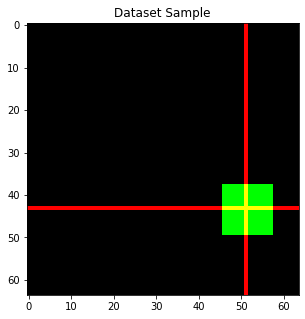

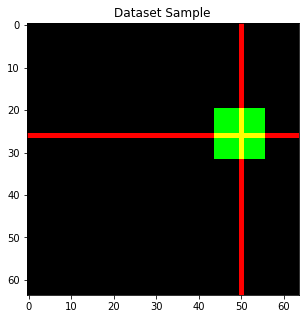

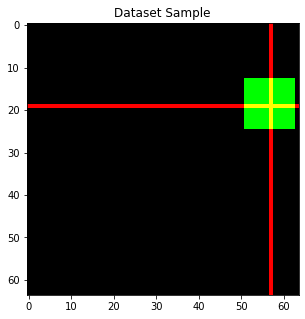

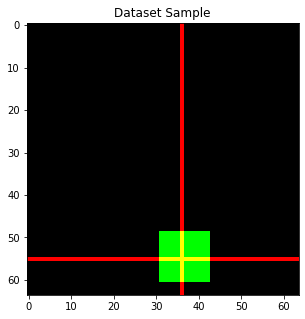

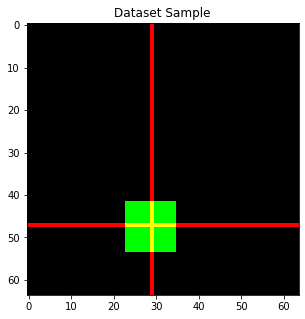

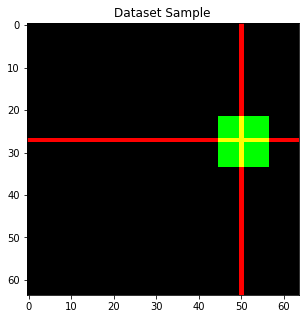

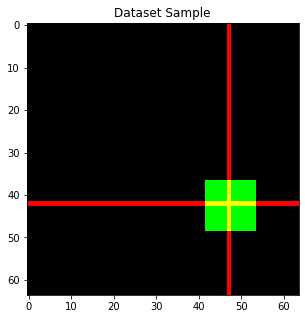

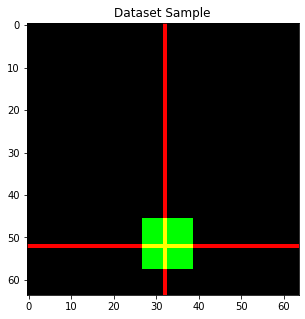

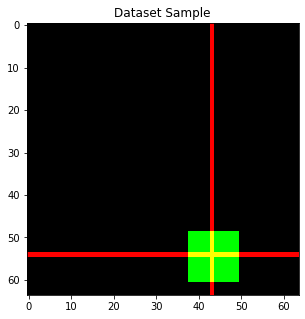

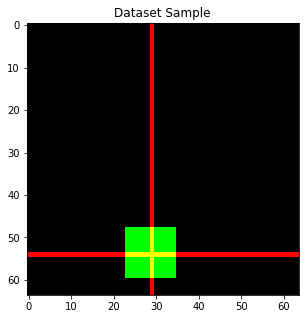

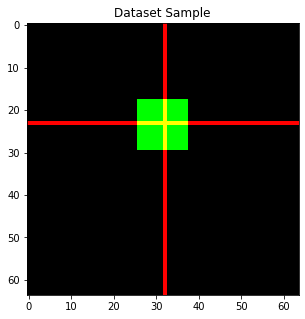

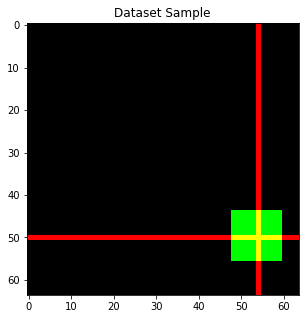

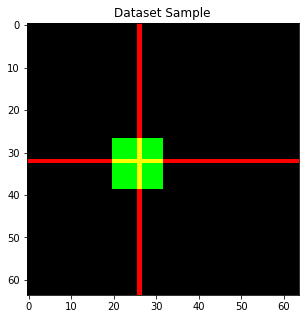

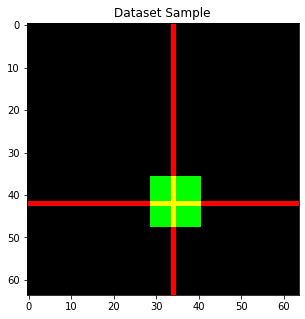

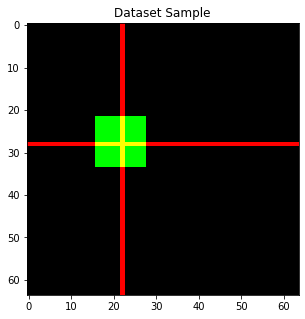

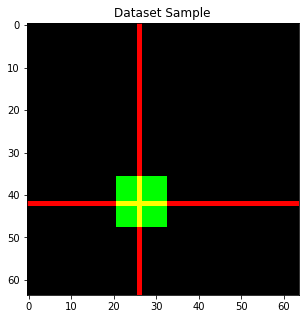

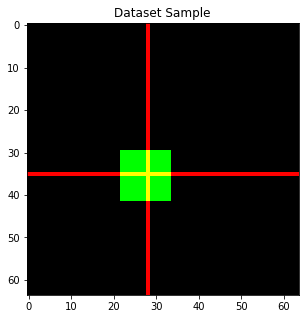

In [168]:
for i in range(50):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    
    img = np.zeros((64,64,3))
    
    px = int(y_p[i,0])
    py = int(y_p[i,1])
    
    img[py,:,0] = 1
    img[:,px,0] = 1
    
    img[:,:,1] = x_test[i,:].reshape((64,64))
    
    ax.imshow(img)
    ax.set_title('Dataset Sample')
    
 
    
    plt.show()
    plt.close()